# The Multi Tier Framework for measuring energy access in Nepal




As reported by [The MTF survey data ](https://mtfenergyaccess.esmap.org/country/nepal) in 2017, Nepal shows that 71.7% of households have grid access, while 23% have access through off-grid solutions.  Using the MTF definition of access, 93.7% of households nationwide are in Tier 1 or above for access to electricity.

To learn more about energy access in Nepal, download MTF’s Country Diagnostic Report,[here](esmap-mtf-data/Nepal/references/mtf-energy-access-country-diagnostic-report_nepal-9.2019.pdf)

## The structure of the database

- Section A: Household Roster
- Section B: Household Characteristics
- Section C: Supply and Demand of Electricity 
- Section D: Willingness to pay for a grid connection
- Section E: Willingness to pay for improved electricity supply
- Section F: Willingness to pay for solar device
- Section J: Use of cooking Solutions
- Section K: Space and Water heating 
- Section L: Willingness to pay for an improved cookstove
- Section M: Consumption / Expenditure
- Section N: Households Assets : Transport and Agriculture Equipment Ownership and Total
- Section O: Household land ownership and other assets
- Section P: Household economiv shocks
- Section Q: Street Ligthing
- Section R: Time use
- Section S: Health impacts
- Section T: Attitudes
- Section U: Women's empowerment 


### Analysis

Section C contains the informations related to Supply and Demand electricity. 

In [2]:
# Importing necessary libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from IPython.display import Image
import itertools
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading main dataset into python
#main_dataset = pd.read_stata("raw_data/dta/maindataset.dta")

main_dataset = pd.read_csv("raw_data/csv/main.csv")
main_dataset.drop('Unnamed: 0', axis = 1, inplace = True)
#main_dataset

# This may not be needed, but decideced to read it
codebook = pd.read_excel('references/codebook.xlsx')


In [4]:
main_dataset.head()


,HHID,Id,Date_HH_Visit,Eco_Reg,Province,Dev_Region,Zone,VDC_MUN,VDC_MUN_NAME,District,...,M32,M33,O1,O2,O2_SO,O2_SO_Recode,O3,O3_con,O4,TIME_END_VISIT1
0,110148801,2cd3defe83504f3593c43b93509a4c9f,2017-11-11,1,1,1,1,1,Khewang,1,...,8000.0,5000.0,1,1.0,NaN,NaN,8.0,0.406990,1200000.0,2017-11-11T02:49:33Z
1,110148802,d85646020ba744eb9b1b4bf76ca4e454,2017-11-11,1,1,1,1,1,Khewang,1,...,0.0,0.0,1,1.0,NaN,NaN,15.0,0.763106,2000000.0,2017-11-11T04:04:27Z
2,110148803,d8612908fadc4ba58c01a706a7e5ef64,2017-11-11,1,1,1,1,1,Khewang,1,...,15000.0,10000.0,1,1.0,NaN,NaN,9.0,0.457863,1350000.0,2017-11-11T04:47:09Z
3,110148804,9157d2376525473f925444bf756cdbe7,2017-11-11,1,1,1,1,1,Khewang,1,...,0.0,0.0,1,1.0,NaN,NaN,8.0,0.406990,1000000.0,2017-11-11T05:41:59Z
4,110148805,b84e1ea7a450429c8a90de5f2a42fe4b,2017-11-11,1,1,1,1,1,Khewang,1,...,0.0,0.0,1,1.0,NaN,NaN,5.0,0.254369,600000.0,2017-11-11T07:00:32Z


In [5]:
# Exploring the shape of the dataset
print(main_dataset.shape)
print(main_dataset.columns)

column_names = main_dataset.columns
household_info_columns = column_names[:19]
# electricity_df[household_info_columns].head()

(6000, 1247)
Index(['HHID', 'Id', 'Date_HH_Visit', 'Eco_Reg', 'Province', 'Dev_Region',
       'Zone', 'VDC_MUN', 'VDC_MUN_NAME', 'District',
       ...
       'M32', 'M33', 'O1', 'O2', 'O2_SO', 'O2_SO_Recode', 'O3', 'O3_con', 'O4',
       'TIME_END_VISIT1'],
      dtype='object', length=1247)


## section c creation from the main dataset
The section c relates to electricity access in Nepal

In [6]:
#Obtaining C section list
c_section = [column for column in column_names if column.startswith('C')]
type(c_section)
c_section[4:]
c_section.sort()

c_section
target_columns = list(itertools.chain(household_info_columns ,c_section))
electricity_df = main_dataset[target_columns]
electricity_df.head()




,HHID,Id,Date_HH_Visit,Eco_Reg,Province,Dev_Region,Zone,VDC_MUN,VDC_MUN_NAME,District,...,C97,C98,C99,C9_A,CF_F,CF_Stove,CONSENT,C_AVAILABLE,C_DATE_TIME,C_WHO
0,110148801,2cd3defe83504f3593c43b93509a4c9f,2017-11-11,1,1,1,1,1,Khewang,1,...,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,0
1,110148802,d85646020ba744eb9b1b4bf76ca4e454,2017-11-11,1,1,1,1,1,Khewang,1,...,NaN,NaN,NaN,NaN,NaN,3000.0,1,1,NaN,0
2,110148803,d8612908fadc4ba58c01a706a7e5ef64,2017-11-11,1,1,1,1,1,Khewang,1,...,NaN,NaN,NaN,NaN,NaN,1500.0,1,1,NaN,0
3,110148804,9157d2376525473f925444bf756cdbe7,2017-11-11,1,1,1,1,1,Khewang,1,...,NaN,NaN,NaN,NaN,NaN,5000.0,1,1,NaN,0
4,110148805,b84e1ea7a450429c8a90de5f2a42fe4b,2017-11-11,1,1,1,1,1,Khewang,1,...,NaN,NaN,NaN,NaN,NaN,1500.0,1,1,NaN,0


In [7]:
electricity_df.head(5)


,HHID,Id,Date_HH_Visit,Eco_Reg,Province,Dev_Region,Zone,VDC_MUN,VDC_MUN_NAME,District,...,C97,C98,C99,C9_A,CF_F,CF_Stove,CONSENT,C_AVAILABLE,C_DATE_TIME,C_WHO
0,110148801,2cd3defe83504f3593c43b93509a4c9f,2017-11-11,1,1,1,1,1,Khewang,1,...,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,0
1,110148802,d85646020ba744eb9b1b4bf76ca4e454,2017-11-11,1,1,1,1,1,Khewang,1,...,NaN,NaN,NaN,NaN,NaN,3000.0,1,1,NaN,0
2,110148803,d8612908fadc4ba58c01a706a7e5ef64,2017-11-11,1,1,1,1,1,Khewang,1,...,NaN,NaN,NaN,NaN,NaN,1500.0,1,1,NaN,0
3,110148804,9157d2376525473f925444bf756cdbe7,2017-11-11,1,1,1,1,1,Khewang,1,...,NaN,NaN,NaN,NaN,NaN,5000.0,1,1,NaN,0
4,110148805,b84e1ea7a450429c8a90de5f2a42fe4b,2017-11-11,1,1,1,1,1,Khewang,1,...,NaN,NaN,NaN,NaN,NaN,1500.0,1,1,NaN,0


In [8]:

solar_based_device_name =  [column for column in c_section if column.startswith('C135')]
solar_based_device = electricity_df [solar_based_device_name]
solar_based_device.columns

Index(['C135__1', 'C135__2', 'C135__3', 'C135__4'], dtype='object')

In [9]:
# solar and grid connected people and set H

grid = electricity_df[['HHID','C4']]
province = electricity_df[['HHID','Province']]
solar_based_device = electricity_df[['HHID','C135__4']]
hydro_grid = electricity_df[electricity_df["C44"]!=3][['HHID','C44']]
hydro_grid.head()

,HHID,C44
0,110148801,2.0
1,110148802,2.0
2,110148803,2.0
3,110148804,2.0
4,110148805,2.0


In [10]:

grid_solar = pd.merge(grid, solar_based_device, how = 'left', on = "HHID")

connection_type = pd.merge(grid_solar,hydro_grid, how = 'left',on = "HHID")
connection_type.columns = ['HHID','grid','solar','hydro']
connection_type.fillna(0,inplace = True)
connection_type.reset_index(inplace=True)
connection_type = pd.merge(connection_type,province,how = 'left',on = 'HHID' )


In [29]:
connection_type['hydro'] = connection_type['hydro'].apply(lambda x: 1 if x>0 else 0)
connection_type['solar'] = connection_type['solar'].apply(lambda x: 0 if x>0 else 1)

In [30]:
ctype_pro = connection_type[['grid','solar','hydro','Province']].groupby('Province').sum()

In [32]:
ctype_pro

,grid,solar,hydro
Province,,,
1,1472.0,447,280
2,5958.0,26,0
3,5462.0,560,93
4,605.0,66,14
5,2648.0,69,72
6,3441.0,419,147
7,2922.0,346,209


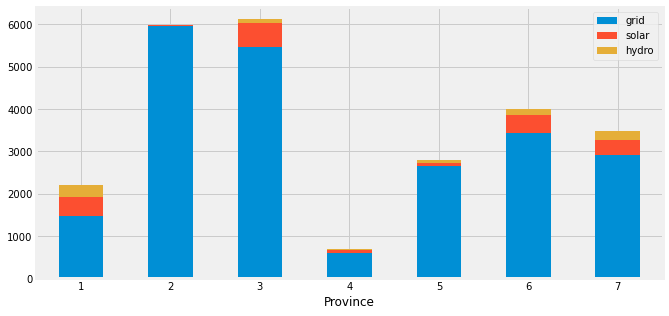

In [31]:
ctype_pro.plot(kind = 'bar', stacked = True, figsize = (10,5));
plt.xticks(rotation = 0);

# Access to Electricity (Nepal)
Section C starts from C2 to C182 column from the main_dataset.  

For Further analysis Specific column will be selected from the main dataset dataframe.

## Connection to the national grid 
From **C2.Is the household connected to the national grid? ** 

1: Yes  ,  2: No 

In [ ]:

Grid_connection_column = main_dataset["C2"]
#Grid_connection_column
#2 is not connected to the grid 
#1 is connected to the grid 

Grid_connection_column.replace({1:'Connected',2:'Not Connected'}, inplace=True)
Perc_Grid_connection = (Grid_connection_column.value_counts(normalize = True)*100)


Perc_Grid_connection



In [ ]:
labels = "National Grid Connection",  "Not Connected to the grid"
explode = (0.1, 0.01) 
fig1, ax1 = plt.subplots()
ax1.pie(Perc_Grid_connection, explode=explode, labels=labels, autopct='%1.0f%%',shadow=True, startangle=90)
ax1.axis('equal')
#ax1.title("Nepal Grid connection ")
ax1.set_title("Nepal Grid connection")
plt.show()

In [ ]:
# 
Perc_Grid_connection.plot(kind = 'bar')
plt.xticks(rotation=0);

for index, value in enumerate(Perc_Grid_connection.values):
    plt.text(index,value+1, f'{value:.0f}%');


### Analysis of Nepal  national grid connection 
From the mtf Nepal energy access, the report claims that 71.1% and 23% households are and not  connected to the national grid respectively. However by looking on the above pie chart from the raw data,  67% households are connected to the national grid, while 33% are not not connected to the  grid 

### main services for the grid connection 


From C7.Who is the service provider of the grid connection: 

- 01: Nepal Electricity Authority(NEA)
- 02: Other Private Electricity Providers

In [ ]:
service_provider = electricity_df['C7']
#filling NAN values with zero
service_provider.fillna(0)
service_provider_def = service_provider.to_frame()
type(service_provider_def)
Perc_service_provider = (service_provider.value_counts(normalize = True)*100)
Perc_service_provider

# plotting the pie chart
labels = "Nepal Electricity Authority(NEA)",  "Other Private Electricity Providers"
explode = (0.1,0.5 ) 
fig1, ax1 = plt.subplots()
ax1.pie(Perc_service_provider, explode=explode, labels=labels, autopct='%1.2f%%',shadow=True, startangle=90)
ax1.axis('equal')
#ax1.title("Nepal Grid connection ")
ax1.set_title("Nepal Grid  service connection Provider")

plt.show()


99.51% of the households connected to the national grid pay to the Nepal Electricity Authorithy (NEA) and few households are connected to private service provider which accounts for 0.49%.



### Reasons households not connected to the grid 
C4. What is the main reason why your household is not connected to the grid? 
- 001 : Grid is too far from household/not available
- 002 : Cost of initial connection is too expensive
- 003: Monthly fee is too expensive
- 004: Satisfied with current energy solution 
- 005: Renting, Landlord decision
- 006: Service Unreliable
- 007: Administrative procedure is too complicated
- 008: Submitted application and waiting for connection
- 009: Company refused to connect the household
- 555: Other, specify



In [ ]:
reason_no_grid_connection =  main_dataset["C4"]
type(reason_no_grid_connection)
# Converting the series into dataframe 
reason_no_grid_connection_df = reason_no_grid_connection.to_frame()
type(reason_no_grid_connection_df)

# Filling NaNs with Zero. This means that the information were not given 

reason_no_grid_connection_df.fillna(0).head(5)
#reason_no_grid_connection.value_counts()
#reason_no_grid_connection_df.value_counts() 
Perc_reason_no_grid_connection = (reason_no_grid_connection.value_counts(normalize = True)*100)
Perc_reason_no_grid_connection



In [ ]:
#Visualizing the reasons why households are not connected to the grid 

labels = "Grid not available","Expensive initial connection","Expensive monthly fee","Current energy solution satisfaction","Landlord decision","Service Unreliable","Complicated Procedure","Waiting connection","Company rejection","Other"

explode = (0.1, 0.1,0.1,0.3,0.5,0.6,0.7,0.8,0.9,1) 
fig1, ax1 = plt.subplots(figsize=(20,20))
patches, texts, auto = ax1.pie(Perc_reason_no_grid_connection, explode=explode, autopct='%1.0f%%',shadow=True, startangle=90,radius=1.2)

#patches, texts, auto = ax1.pie(Perc_reason_no_grid_connection, shadow=True, startangle=90,explode=explode, autopct='%1.1f%%' )
 
plt.legend(patches, labels,loc="left center",bbox_to_anchor=(-0.1, 1.),fontsize=10)
#ax1.title("Nepal Grid connection ")
ax1.axis('equal')
ax1.set_title("Reason households are not connected to the national grid ")
plt.show()


#ax = Perc_reason_no_grid_connection.plot.bar(rot= 30)


From the above pie chart, 70% households were not connected og the grid due to unavailability of grid. 

### Main source of electricity

**C44. is this house connected to a:  **

- 01: Pico hydro
- 02: Micro/Mini-hydro grid
- 03: Neither pico-hydro nor mini/micro grid
- 04: Both pico-hydro and mini/micro-hydro grid



In [ ]:
#electricity_df["C45"].value_counts(dropna = False)


In [ ]:
main_source = electricity_df["C44"]

type(main_source)
grid_source_df = main_source
grid_source.fillna(0)
Perc_main_source = (grid_source_df.value_counts(normalize = True)*100)
Perc_main_source




In [ ]:
#Visualizing the main source of electricity 

labels = "Pico hydro"," Micro/Mini-hydro grid"," Neither pico-hydro grid nor mini/micro grid","Both pico-hydro and mini/micro-hydro grid"

explode = (0.1, 0.1,0.1,0.8) 
fig1, ax1 = plt.subplots(figsize=(6,5))
patches, texts, auto = ax1.pie(Perc_main_source, explode=explode, autopct='%1.2f%%',shadow=True, startangle=90,radius=1.2)

#patches, texts, auto = ax1.pie(Perc_reason_no_grid_connection, shadow=True, startangle=90,explode=explode, autopct='%1.1f%%' )
 
plt.legend(patches, labels,loc="left center",bbox_to_anchor=(-0.1, 1.),fontsize=10)

ax1.axis('equal')
ax1.set_title("Main source of Electricity in Nepal")
plt.show()



58.27% of national grid are connected to the pico hydro so this set it to the main source of electricity in Nepal. 
0.05% are connected to both pico and mini/micro hydro. Small portion of 7.12% are not connected pico hydro nor mini/micro hydro.